# Linear Regression Assignment

****************************************************************

## 1. Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

## 2. Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market

<font color="blue"><b>Lets move to find the solution</b></font>

## 3. Load the Libraries required

In [86]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 4. Data Load

In [88]:
CarPriceDetails = pd.read_csv("CarPrice_Assignment.csv")

In [89]:
CarPriceDetails.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [90]:
#metadata = pd.read_excel("Data Dictionary - carprices.xlsx", sheet_name = "Sheet1", usecols={'Car_ID'} , skiprows=4)
#metadata

#### Data Dictionary

Car_ID --> Unique id of each observation (Interger)		
Symboling --> Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
carCompany --> Name of car company (Categorical)		
fueltype --> Car fuel type i.e gas or diesel (Categorical)		
aspiration --> Aspiration used in a car (Categorical)		
doornumber --> Number of doors in a car (Categorical)		
carbody --> body of car (Categorical)		
drivewheel --> type of drive wheel (Categorical)		
enginelocation --> Location of car engine (Categorical)		
wheelbase --> Weelbase of car (Numeric)		
carlength --> Length of car (Numeric)		
carwidth --> Width of car (Numeric)		
carheight --> height of car (Numeric)		
curbweight --> The weight of a car without occupants or baggage. (Numeric)		
enginetype --> Type of engine. (Categorical)		
cylindernumber --> cylinder placed in the car (Categorical)		
enginesize --> Size of car (Numeric)		
fuelsystem --> Fuel system of car (Categorical)		
boreratio --> Boreratio of car (Numeric)		
stroke --> Stroke or volume inside the engine (Numeric)		
compressionratio --> compression ratio of car (Numeric)		
horsepower --> Horsepower (Numeric)		
peakrpm --> car peak rpm (Numeric)		
citympg --> Mileage in city (Numeric)		
highwaympg --> Mileage on highway (Numeric)		
price(Dependent variable) --> Price of car (Numeric)		


## 5. Data Inspection

In [91]:
CarPriceDetails

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [92]:
CarPriceDetails.shape

(205, 26)

In [93]:
CarPriceDetails.columns.tolist()

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [94]:
CarPriceDetails.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<font color = "green" ><b>Observation:</b>looking all above, we could see there are many numerical and categorical variables in the data set
Will do analysis on these variables more specifically later part</font>

## 6. Data Cleaning

#### Check for NULL values

In [95]:
CarPriceDetails.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<font color = "green" ><b>Observation:</b> No NaN/NULL value </font>

#### Check for Duplicates

In [96]:
CarPriceDetails[CarPriceDetails.duplicated() == True]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<font color = "Green" ><b>Observation:</b> No result returned, this means NO duplicates in data frame, but this does not gurantee on surity of NO duplicates occurence, duplicates may be there due to some values ambiguity. Will try to identfy those by manual observation </font>

#### Inconsistence data fix
There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name as the independent variable for model building. 

In [97]:
CarPriceDetails["CarName"] = CarPriceDetails["CarName"].str.replace('-', ' ')
CarPriceDetails.CarName.unique()

CarPriceDetails["CarName"] =CarPriceDetails.CarName.map(lambda x: x.split(" ", 1)[0])
# As we have some redundant data in carName lets fix it 
CarPriceDetails.CarName = CarPriceDetails['CarName'].str.lower()
CarPriceDetails['CarName'] = CarPriceDetails['CarName'].str.replace('vw','volkswagen')
CarPriceDetails['CarName'] = CarPriceDetails['CarName'].str.replace('vokswagen','volkswagen')
CarPriceDetails['CarName'] = CarPriceDetails['CarName'].str.replace('toyouta','toyota')
CarPriceDetails['CarName'] = CarPriceDetails['CarName'].str.replace('porcshce','porsche')
CarPriceDetails['CarName'] = CarPriceDetails['CarName'].str.replace('maxda','mazda')


In [98]:
CarPriceDetails.CarName.unique().tolist()
# CarPriceDetails.info()


['alfa',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'buick',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

<font color = "Green" ><b>Observation:</b> Now the names are fine, but make note, these are <u>company names</u></font>

## 7. Data Preparation

### Visualizing the data

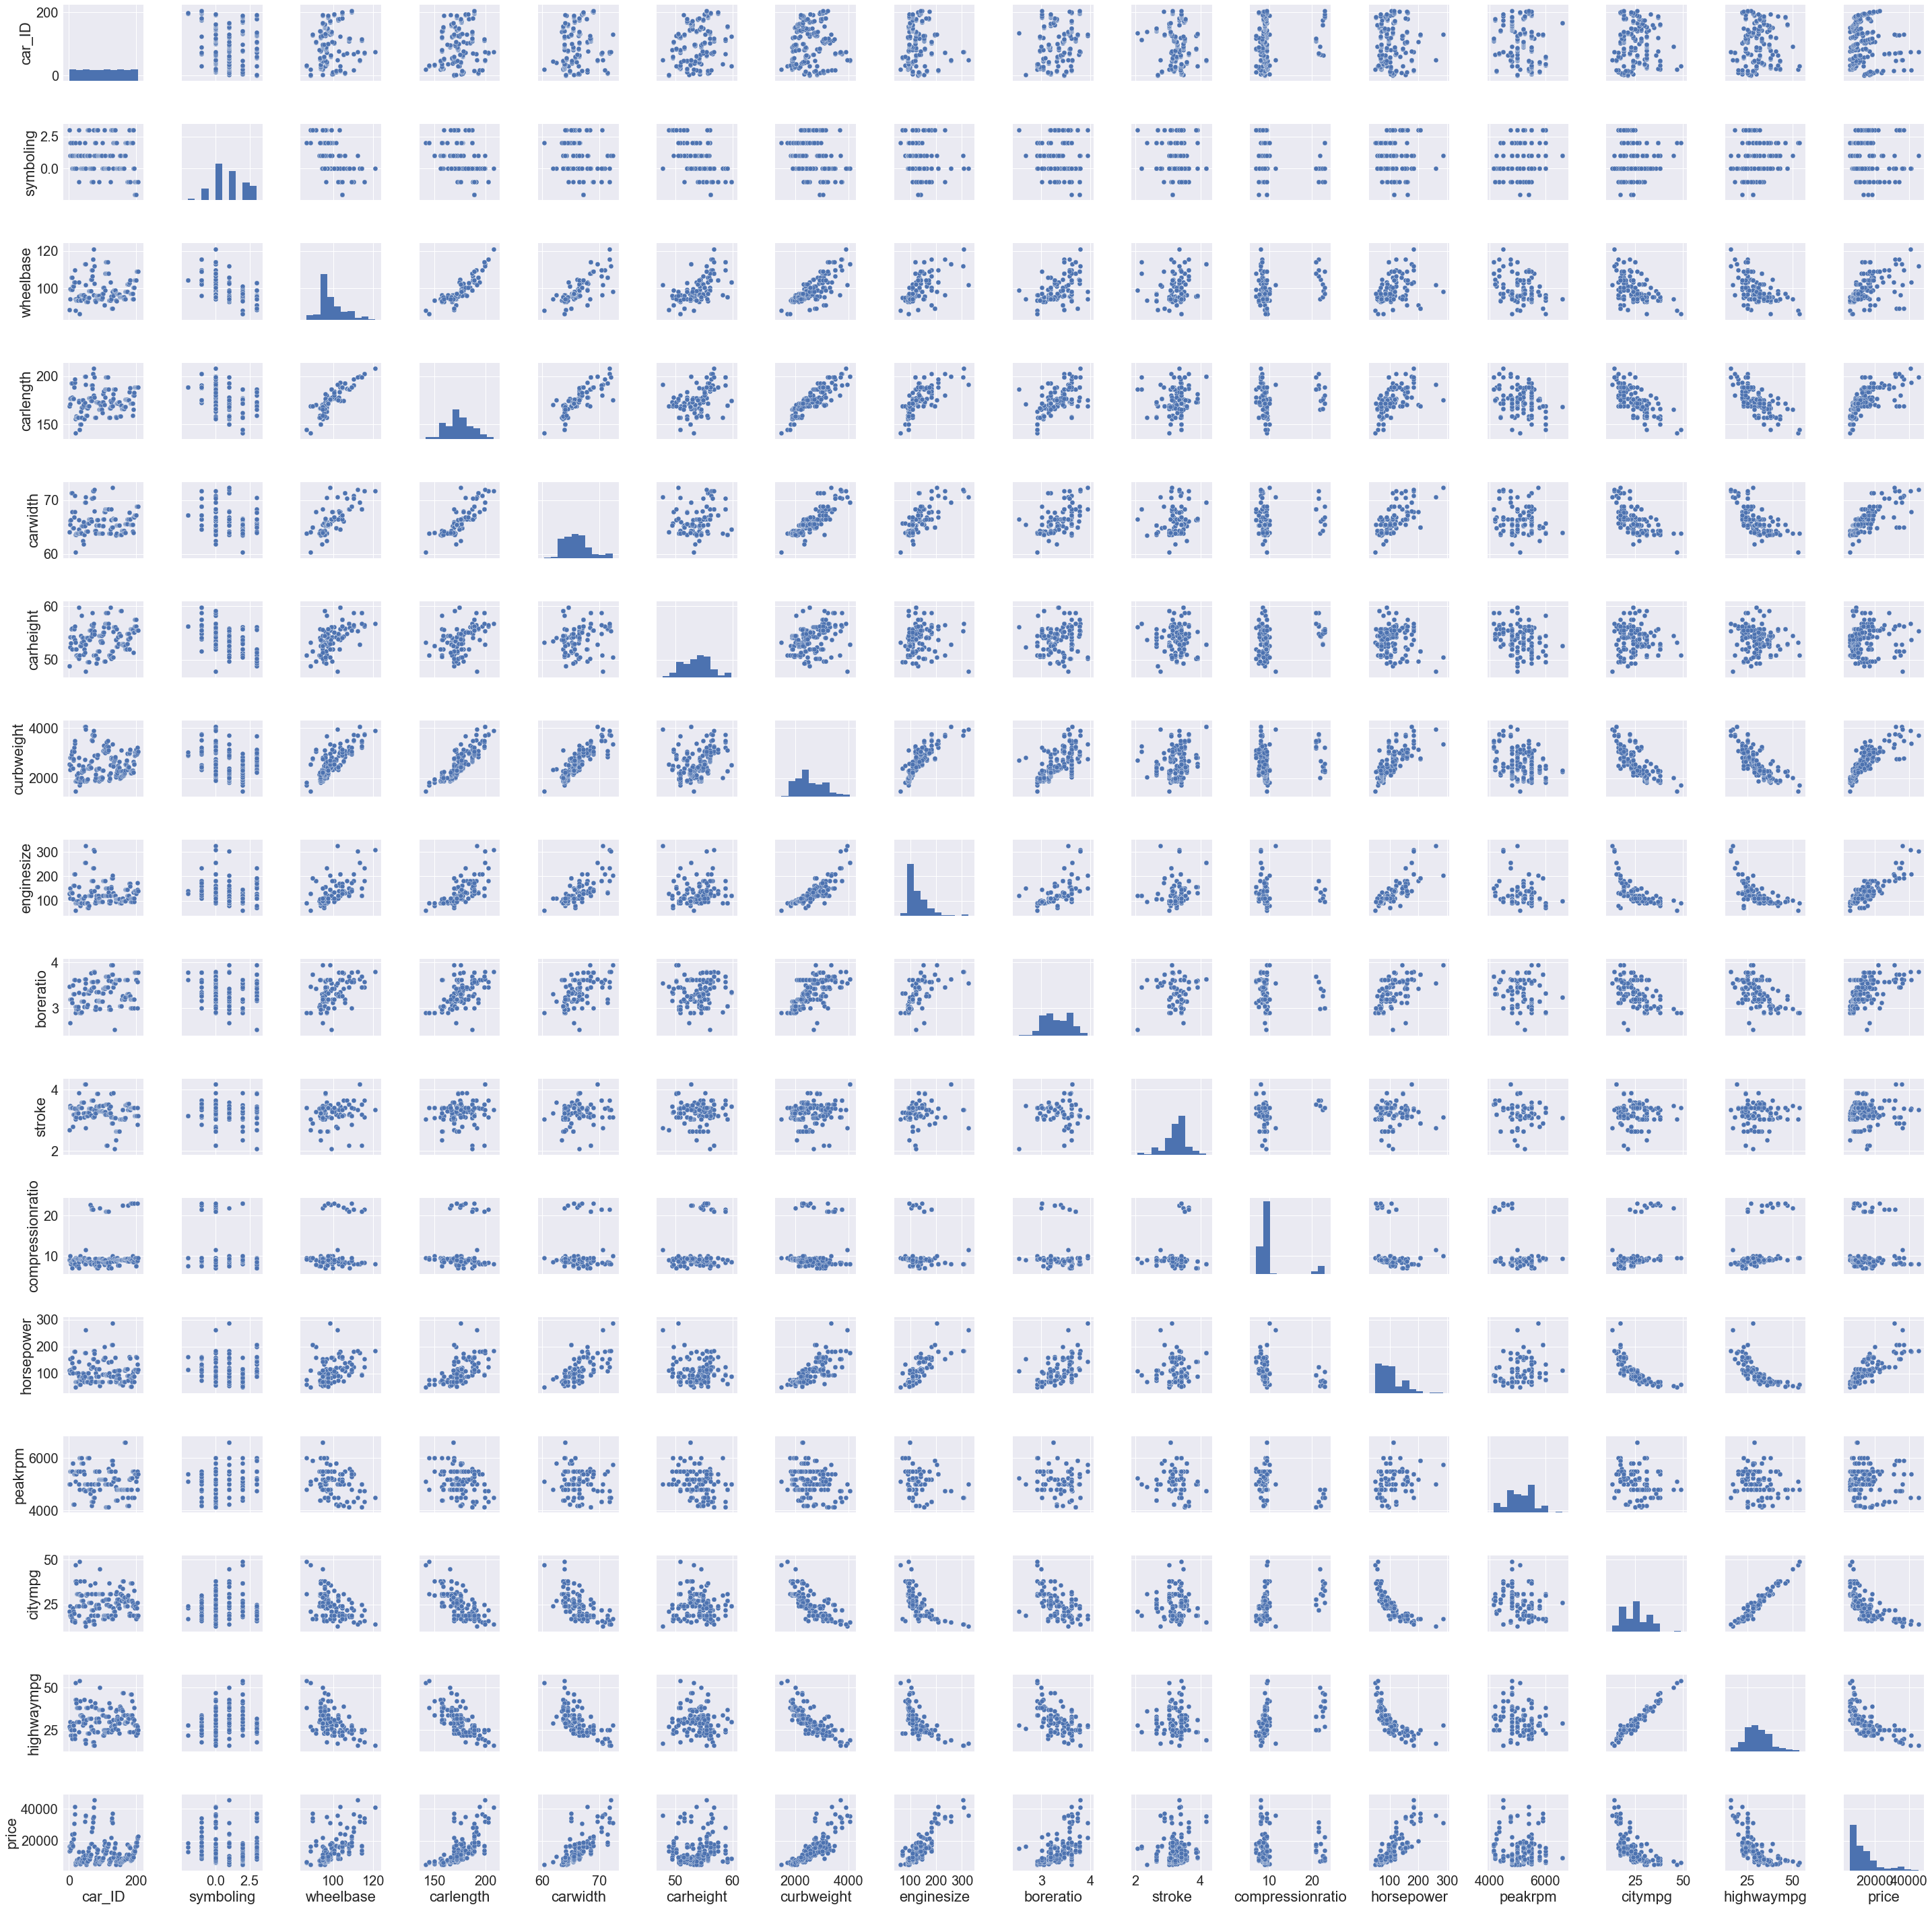

In [99]:
# Let's plot a pair plot of all variables in our dataframe
sns.set(font_scale=2)
sns.pairplot(CarPriceDetails)

#### Lets check the correalation between all the variables

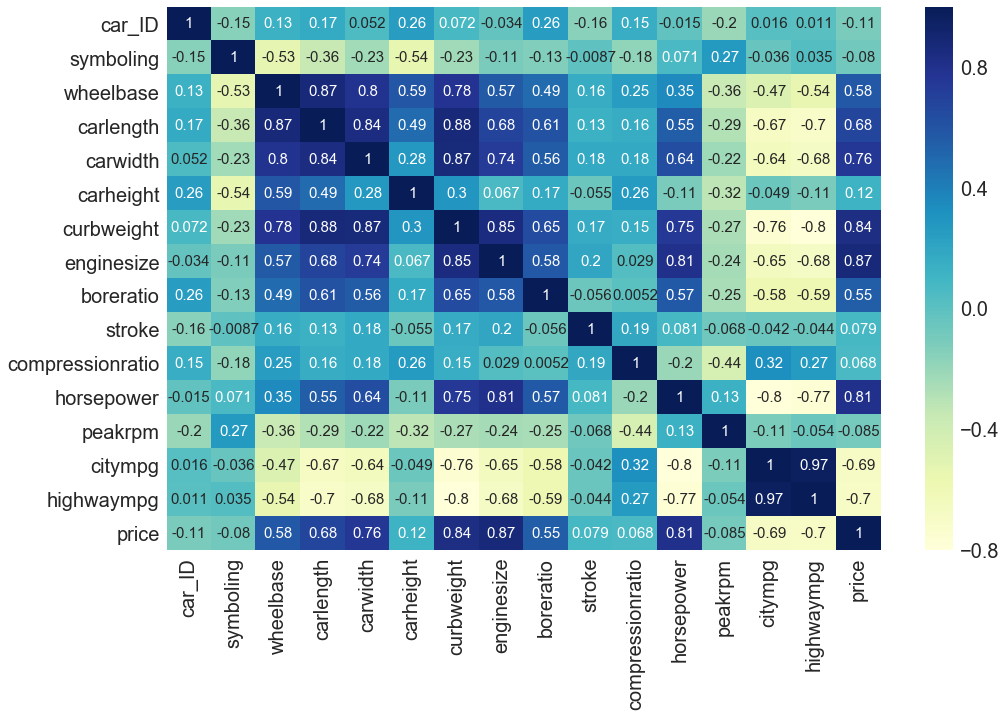

In [100]:
plt.figure(figsize = (16, 10))
sns.heatmap(CarPriceDetails.corr(), annot = True, annot_kws={"size": 15}, cmap="YlGnBu")
plt.show()

#### Dealing with highly corelated data after data visualisation

<font color = "Green" > From above scatter plots and also the heat map as we can notice there is a high corelation between:

1.carlength, curbweight, wheelbase and carwidth, so we can drop 3 out of 4, so lets drop carwidth and curbweight and wheelbase

2.There is a high corelation of .97 between highwaympg and citympg, so lets drop highwaympg
</font>

In [101]:
CarPriceDetails.drop(['carwidth','curbweight','wheelbase','highwaympg'], axis =1, inplace = True)
#we can also remove carID  as its just a serial number 
CarPriceDetails.drop(['car_ID'], axis =1, inplace = True)


In [102]:
CarPriceDetails

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa,gas,std,two,convertible,rwd,front,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.00,111,5000,21,13495.000
1,3,alfa,gas,std,two,convertible,rwd,front,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.00,111,5000,21,16500.000
2,1,alfa,gas,std,two,hatchback,rwd,front,171.2,52.4,...,six,152,mpfi,2.68,3.47,9.00,154,5000,19,16500.000
3,2,audi,gas,std,four,sedan,fwd,front,176.6,54.3,...,four,109,mpfi,3.19,3.40,10.00,102,5500,24,13950.000
4,2,audi,gas,std,four,sedan,4wd,front,176.6,54.3,...,five,136,mpfi,3.19,3.40,8.00,115,5500,18,17450.000
5,2,audi,gas,std,two,sedan,fwd,front,177.3,53.1,...,five,136,mpfi,3.19,3.40,8.50,110,5500,19,15250.000
6,1,audi,gas,std,four,sedan,fwd,front,192.7,55.7,...,five,136,mpfi,3.19,3.40,8.50,110,5500,19,17710.000
7,1,audi,gas,std,four,wagon,fwd,front,192.7,55.7,...,five,136,mpfi,3.19,3.40,8.50,110,5500,19,18920.000
8,1,audi,gas,turbo,four,sedan,fwd,front,192.7,55.9,...,five,131,mpfi,3.13,3.40,8.30,140,5500,17,23875.000
9,0,audi,gas,turbo,two,hatchback,4wd,front,178.2,52.0,...,five,131,mpfi,3.13,3.40,7.00,160,5500,16,17859.167


#### Dealing with outliers

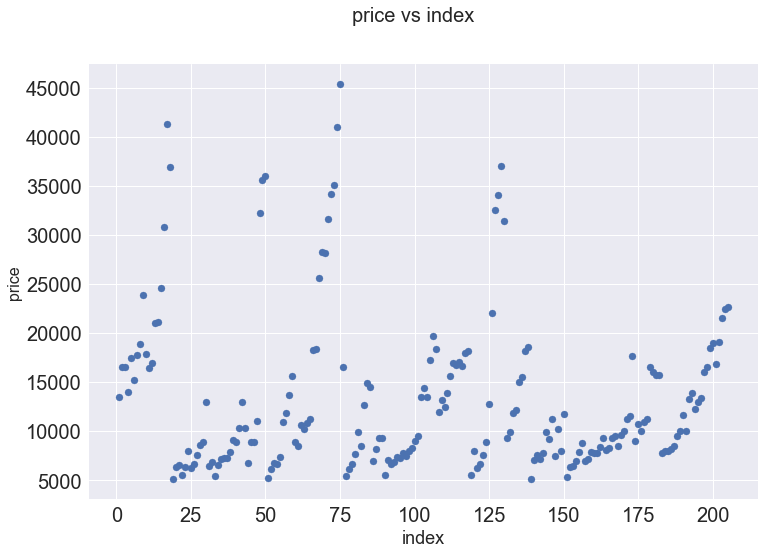

In [103]:
# Plotting price 
c = [i for i in range(1,206,1)]
fig = plt.figure(figsize=(12,8))
plt.scatter(c,CarPriceDetails['price'])
fig.suptitle('price vs index', fontsize=20)              
plt.xlabel('index', fontsize=18) 
plt.ylabel('price', fontsize=16)  
plt.show()

### Categorical Fields 

##### Converting all categorical fields of two levels to binary

In [104]:
# Will convert all the values of 'Yes' to 1 and 'No' to 0
CarPriceDetails['aspiration'] = CarPriceDetails['aspiration'].map({'std': 1, 'turbo': 0})
CarPriceDetails['fueltype'] = CarPriceDetails['fueltype'].map({'gas': 1, 'diesel': 0})
CarPriceDetails['enginelocation'] = CarPriceDetails['enginelocation'].map({'front': 1, 'rear': 0})
CarPriceDetails['doornumber'] = CarPriceDetails['doornumber'].map({'two': 1, 'four': 0})


In [105]:
CarPriceDetails.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa,1,1,1,convertible,rwd,1,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,alfa,1,1,1,convertible,rwd,1,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,alfa,1,1,1,hatchback,rwd,1,171.2,52.4,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,audi,1,1,0,sedan,fwd,1,176.6,54.3,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,audi,1,1,0,sedan,4wd,1,176.6,54.3,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


#### Generating dummy values for categorical columns of more than 2 levels

<font color = "Green" >As we can se we have few categorial fields like carName, carbody, driveWheel, fuelsystem, cylinderNumber, engineType So lets generate dummy columns for all of these first.
</font>

In [106]:
df = pd.get_dummies(CarPriceDetails)
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,171.2,52.4,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,176.6,54.3,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,176.6,54.3,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


### Features using Normalisation

In [107]:
# Rescaling the feature
# defining a normalisation function 
cols_to_norm = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'price']
# Normalising the numeric fields 
normalised_df = df[cols_to_norm].apply(lambda x: (x-np.mean(x))/ (max(x) - min(x)))
normalised_df.head()

df['symboling'] = normalised_df['symboling']
df['carlength'] = normalised_df['carlength']
df['carheight'] = normalised_df['carheight']
df['enginesize'] = normalised_df['enginesize']
df['boreratio'] = normalised_df['boreratio']
df['stroke'] = normalised_df['stroke']
df['price'] = normalised_df['price']
df['compressionratio'] = normalised_df['compressionratio']
df['horsepower'] = normalised_df['horsepower']
df['peakrpm']= normalised_df['peakrpm']
df['citympg'] = normalised_df['citympg']
df.head()


,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.433171,1,1,1,1,-0.078347,-0.410407,0.011671,0.100174,-0.274007,...,0,0,0,0,0,0,0,1,0,0
1,0.433171,1,1,1,1,-0.078347,-0.410407,0.011671,0.100174,-0.274007,...,0,0,0,0,0,0,0,1,0,0
2,0.033171,1,1,1,1,-0.042526,-0.110407,0.094689,-0.464111,0.102184,...,0,0,0,0,0,0,0,1,0,0
3,0.233171,1,1,0,1,0.038071,0.047927,-0.067575,-0.099826,0.068850,...,0,0,0,0,0,0,0,1,0,0
4,0.233171,1,1,0,1,0.038071,0.047927,0.034312,-0.099826,0.068850,...,0,0,0,0,0,0,0,1,0,0


## Splitting Data into Training and Testing Sets


In [108]:
refinedcol = df.columns
refinedcol

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price',
       'CarName_alfa', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_

In [109]:
# Putting feature variable to X
# df.columns
X = df[['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'CarName_alfa', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]

# Putting response variable to y
y = df['price']

In [110]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

#### RFE

In [111]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False False False  True False  True  True  True False False
 False False False  True  True  True False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False  True False False
 False False  True  True False  True False  True  True  True False False
 False False False False False False]
[46 45  5 49 40  1 16  1  1  1 50 34  4 48 15  1  1  1 21 17 20 33 19 41
 47  6 26  2 14  1 23 10 28 44 24 11  9 31 30 32 36 43 35 39  8  1  3 13
 29  7  1  1 12  1 22  1  1  1 37 27 38 25 51 42 18 52]


In [112]:
X_train.columns[rfe.support_]

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_porsche', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [113]:
#variables that are to be dropped
X_train.columns
col = X_train.columns[~rfe.support_]
col

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'CarName_alfa', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_six', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_s

In [114]:
print("Before droping of columns")
X_train.columns
X_train1 = X_train.drop(col,1)
print("After Droping of columns")
X_train1.columns

df.head()

Before droping of columns
After Droping of columns


,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.433171,1,1,1,1,-0.078347,-0.410407,0.011671,0.100174,-0.274007,...,0,0,0,0,0,0,0,1,0,0
1,0.433171,1,1,1,1,-0.078347,-0.410407,0.011671,0.100174,-0.274007,...,0,0,0,0,0,0,0,1,0,0
2,0.033171,1,1,1,1,-0.042526,-0.110407,0.094689,-0.464111,0.102184,...,0,0,0,0,0,0,0,1,0,0
3,0.233171,1,1,0,1,0.038071,0.047927,-0.067575,-0.099826,0.068850,...,0,0,0,0,0,0,0,1,0,0
4,0.233171,1,1,0,1,0.038071,0.047927,0.034312,-0.099826,0.068850,...,0,0,0,0,0,0,0,1,0,0


### Building Model By droping columns after RFE 

In [115]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train1 = sm.add_constant(X_train1)

In [116]:
lm_1 = sm.OLS(y_train,X_train1).fit() # Running the linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.94e-61
Time:                        21:26:06   Log-Likelihood:                 206.99
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     128   BIC:                            -339.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

#### Lets also check the VIF values 

In [117]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [118]:
df.drop(col, axis =1, inplace = True)
# df.head()

In [119]:
# Calculating Vif value
# df.head()
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
9,enginetype_rotor,inf
14,cylindernumber_two,inf
1,enginesize,7.110000
10,cylindernumber_eight,3.430000
0,carlength,3.000000
2,boreratio,2.470000
6,CarName_buick,2.210000
8,enginetype_dohcv,1.950000
7,CarName_porsche,1.790000
13,cylindernumber_twelve,1.750000


### Corelation Matrix

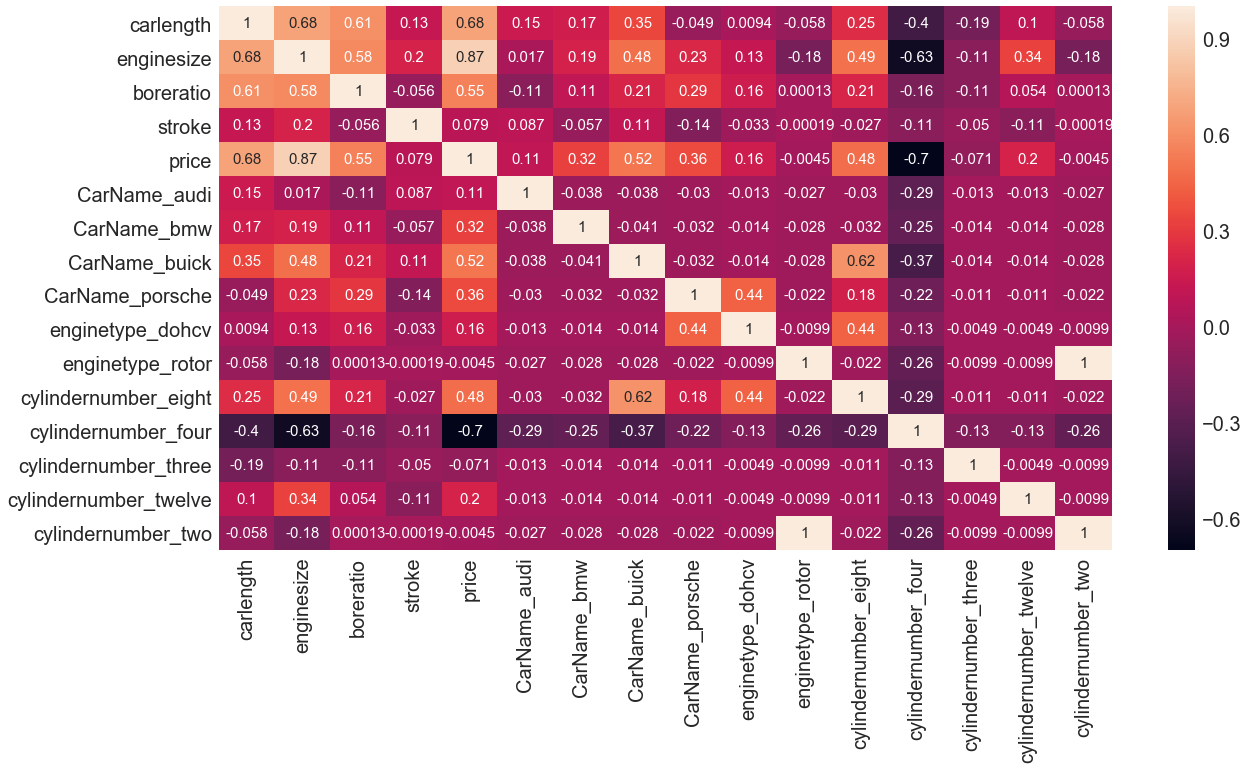

In [120]:
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True, annot_kws={"size": 15})

##### Droping the values and updating the model-2 

As we can see from heat map the cylindernumber_two and enginetype_rotor are highly corelated, the corelation is 1 and also the Vif value is pretty high for enginetype_rotor. It is infinity lets drop it.

In [121]:
# Dropping highly correlated variables and insignificant variables
X_train2 = X_train1.drop('enginetype_rotor', 1)

In [122]:
# Creating a second fitted model
lm_2 = sm.OLS(y_train,X_train2).fit()

In [123]:
#Let's see the summary of our second linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.94e-61
Time:                        21:26:09   Log-Likelihood:                 206.99
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     128   BIC:                            -339.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [124]:
df.drop('enginetype_rotor', axis =1, inplace = True)

In [125]:
# Calculating Vif value
vif_cal(input_data= df, dependent_col="price")

,Var,Vif
1,enginesize,7.11
9,cylindernumber_eight,3.43
0,carlength,3.00
2,boreratio,2.47
6,CarName_buick,2.21
8,enginetype_dohcv,1.95
7,CarName_porsche,1.79
12,cylindernumber_twelve,1.75
3,stroke,1.50
10,cylindernumber_four,1.43


##### Droping the values and updating the model-3

As we can see the cylindernumber_eight its vif is 3.43 and also we can see that it is positively corelated with enginetype_dohcv(0.44) and enginesize (0.49) lets go ahead and drop it 

In [126]:
# Dropping highly correlated variables and insignificant variables
X_train3 = X_train2.drop('cylindernumber_eight', 1)

In [127]:
# Creating a third fitted model 
lm_3 = sm.OLS(y_train,X_train3).fit()

In [128]:
#Let's see the summary of our third linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     98.52
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.50e-60
Time:                        21:26:10   Log-Likelihood:                 203.22
No. Observations:                 143   AIC:                            -378.4
Df Residuals:                     129   BIC:                            -337.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [129]:
df.drop('cylindernumber_eight', axis =1, inplace = True)

In [130]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,5.30
0,carlength,2.89
2,boreratio,2.35
7,CarName_porsche,1.70
6,CarName_buick,1.63
11,cylindernumber_twelve,1.55
9,cylindernumber_four,1.33
3,stroke,1.30
8,enginetype_dohcv,1.25
5,CarName_bmw,1.15


##### Droping the values and updating the model-4
As we can see the enginetype_dohcv has very high pvalue and it is negatively corelated to CarName_porsche

In [131]:
# Dropping highly correlated variables and insignificant variables 
X_train4 = X_train3.drop('enginetype_dohcv', 1)

In [132]:
# Creating a fourth fitted model
lm_4 = sm.OLS(y_train,X_train4).fit()

In [133]:
#Let's see the summary of our fourth linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     107.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.37e-61
Time:                        21:26:10   Log-Likelihood:                 203.21
No. Observations:                 143   AIC:                            -380.4
Df Residuals:                     130   BIC:                            -341.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [134]:
df.drop('enginetype_dohcv', axis =1, inplace = True)

In [135]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,5.30
0,carlength,2.89
2,boreratio,2.34
6,CarName_buick,1.63
10,cylindernumber_twelve,1.55
7,CarName_porsche,1.45
8,cylindernumber_four,1.33
3,stroke,1.30
5,CarName_bmw,1.15
11,cylindernumber_two,1.15


##### Droping the values and updating the model-5
As we can see cylindernumber_four is negatively corelated to  enginesize and car width with values of -0.52 and -0.63 and also the vif is very high 30.73. Lets drop it 

In [136]:
# Dropping highly correlated variables and insignificant variables
X_train5 = X_train4.drop('cylindernumber_four', 1)

In [137]:
# Creating a fifth fitted model
lm_5 = sm.OLS(y_train,X_train5).fit()

In [138]:
#Let's see the summary of our fifth linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.44e-61
Time:                        21:26:11   Log-Likelihood:                 200.15
No. Observations:                 143   AIC:                            -376.3
Df Residuals:                     131   BIC:                            -340.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [139]:
df.drop('cylindernumber_four', axis =1, inplace = True)

In [140]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,4.24
0,carlength,2.89
2,boreratio,2.25
6,CarName_buick,1.48
9,cylindernumber_twelve,1.43
7,CarName_porsche,1.41
3,stroke,1.26
4,CarName_audi,1.12
10,cylindernumber_two,1.12
5,CarName_bmw,1.10


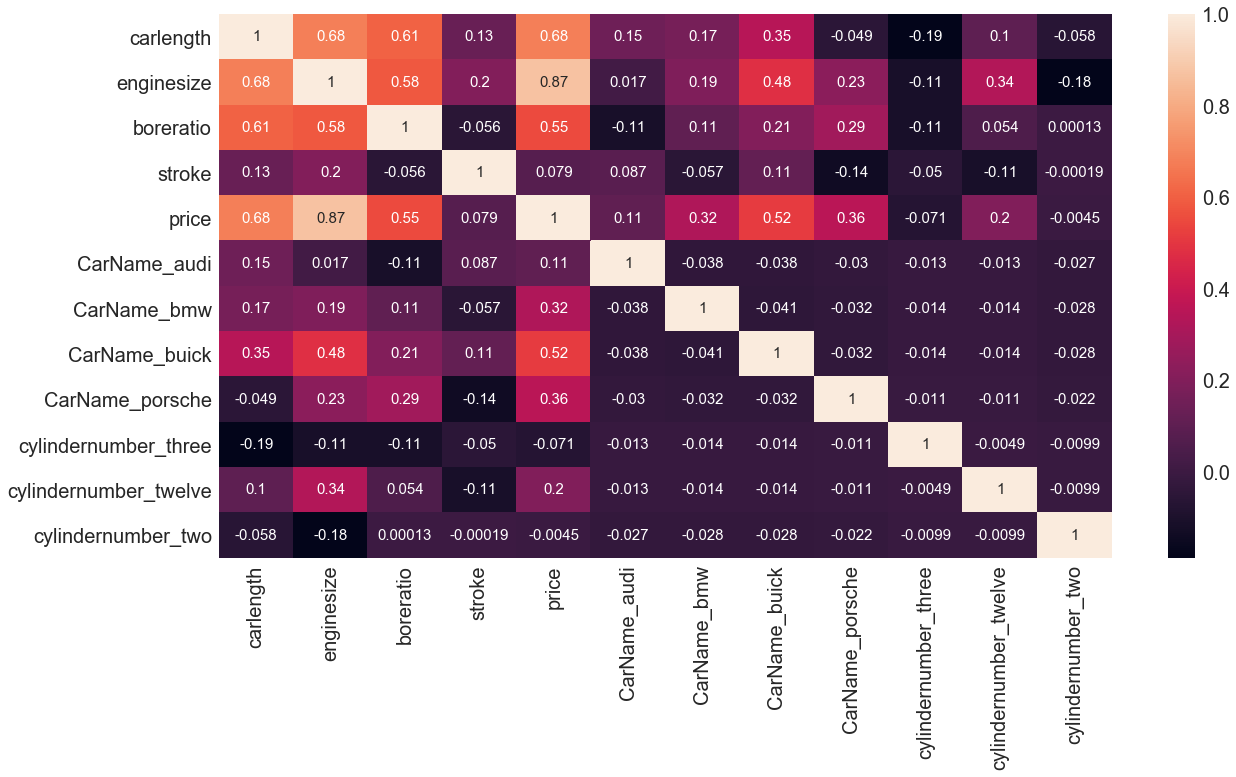

In [141]:
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True, annot_kws={"size": 15})

##### Droping the values and updating the model-6
As we can see cylindernumber_twelve is positively corelated to enginesize  with value of 0.34 and also it has high p-value of 1.49 and also it has high negative coefficient. so lets drop it 


In [142]:
# Dropping highly correlated variables and insignificant variables
X_train6 = X_train5.drop('cylindernumber_twelve', 1)

In [143]:
# Creating a sixth fitted model
lm_6 = sm.OLS(y_train,X_train6).fit()

In [144]:
#Let's see the summary of our sixth linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.52e-62
Time:                        21:26:13   Log-Likelihood:                 199.01
No. Observations:                 143   AIC:                            -376.0
Df Residuals:                     132   BIC:                            -343.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0296 

In [145]:
df.drop('cylindernumber_twelve', axis =1, inplace = True)

In [146]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,3.05
0,carlength,2.81
2,boreratio,2.18
6,CarName_buick,1.37
7,CarName_porsche,1.35
3,stroke,1.15
4,CarName_audi,1.12
9,cylindernumber_two,1.08
5,CarName_bmw,1.07
8,cylindernumber_three,1.05


##### Droping the values and updating the model-7
As we can see stroke is positively corelated to enginesize  with value of 0.2 and also it has high p-value of 1.84 and also it has very less co relation with price. so lets drop it


In [147]:
# Dropping highly correlated variables and insignificant variables
X_train7 = X_train6.drop('stroke', 1)

In [148]:
# Creating a seventh fitted model
lm_7 = sm.OLS(y_train,X_train7).fit()

In [149]:
#Let's see the summary of our seventh linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     135.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.71e-62
Time:                        21:26:14   Log-Likelihood:                 198.05
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     133   BIC:                            -346.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0295 

In [150]:
df.drop('stroke', axis =1, inplace = True)

In [151]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,2.83
0,carlength,2.81
2,boreratio,2.11
5,CarName_buick,1.37
6,CarName_porsche,1.32
3,CarName_audi,1.12
8,cylindernumber_two,1.08
4,CarName_bmw,1.06
7,cylindernumber_three,1.04


##### Droping the values and updating the model-8
As we can see boreratio is positively corelated to enginesize and also the carlength with values of 0.58 and 0.61 and also it has high p-value of 1.69 and also it has vif of 2.11, so lets drop it 

In [152]:
# Dropping highly correlated variables and insignificant variables
X_train8 = X_train7.drop('boreratio', 1)

In [153]:
# Creating a eighth fitted model
lm_8 = sm.OLS(y_train,X_train8).fit()

In [154]:
#Let's see the summary of our eighth linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.47e-63
Time:                        21:26:14   Log-Likelihood:                 197.03
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     134   BIC:                            -349.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0290 

In [155]:
df.drop('boreratio', axis =1, inplace = True)

In [156]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,2.73
0,carlength,2.20
4,CarName_buick,1.35
5,CarName_porsche,1.18
3,CarName_bmw,1.06
7,cylindernumber_two,1.06
2,CarName_audi,1.04
6,cylindernumber_three,1.04


##### Droping the values and updating the model-9
As we can see the p-value of cylindernumber_three is high with value of 0.07 and also it has very less corelation with price. As we have other variables which have good corealtion with price. lets drop this variable 

In [157]:
# Dropping highly correlated variables and insignificant variables
X_train9 = X_train8.drop('cylindernumber_three', 1)

In [158]:
# Creating a ninth fitted model
lm_9 = sm.OLS(y_train,X_train9).fit()

In [159]:
#Let's see the summary of our ninth linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     169.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.32e-63
Time:                        21:26:15   Log-Likelihood:                 195.27
No. Observations:                 143   AIC:                            -374.5
Df Residuals:                     135   BIC:                            -350.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0284      0

In [160]:
df.drop('cylindernumber_three', axis =1, inplace = True)

In [161]:
# Calculating Vif value
vif_cal(input_data=df, dependent_col="price")

,Var,Vif
1,enginesize,2.73
0,carlength,2.15
4,CarName_buick,1.34
5,CarName_porsche,1.18
3,CarName_bmw,1.06
6,cylindernumber_two,1.06
2,CarName_audi,1.04


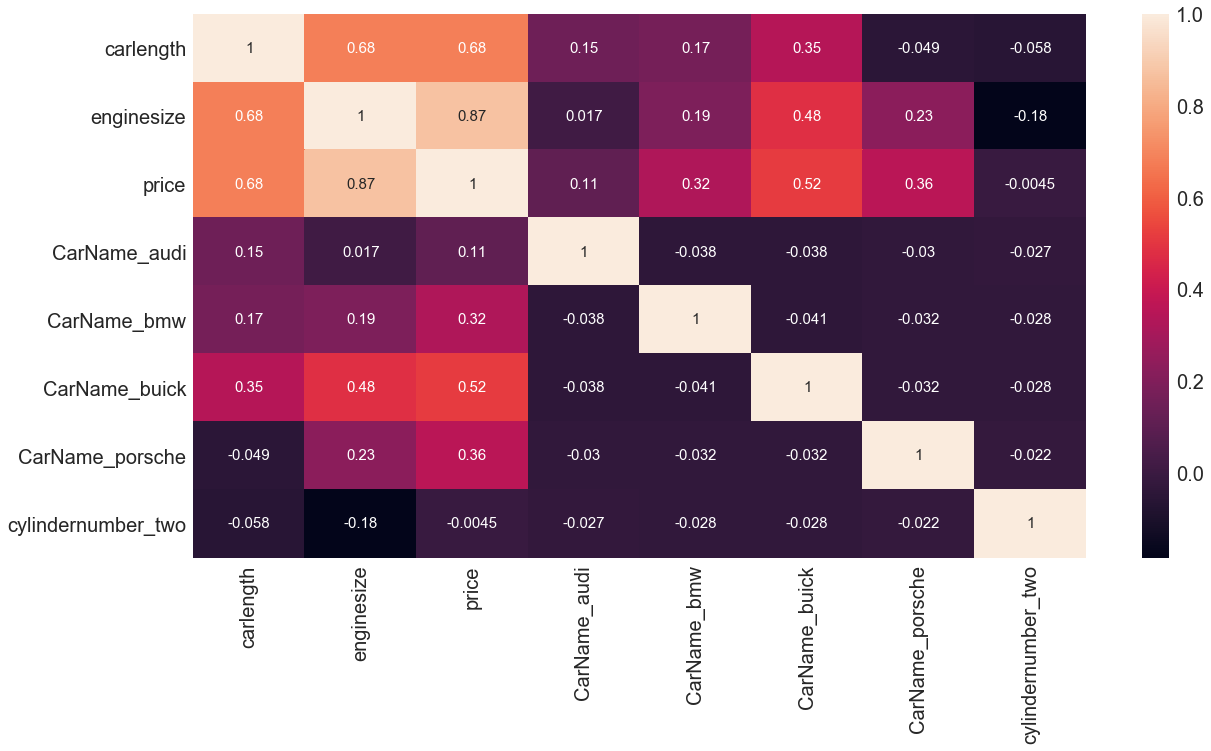

In [162]:
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True, annot_kws={"size": 15})

### Prediction with model-9

In [163]:
# Adding  constant variable to test dataframe
X_test_m9 = sm.add_constant(X_test)

In [164]:
# Creating X_test_m12 dataframe by dropping variables from X_test_m12
X_test_m9 = X_test_m9.drop(col, axis=1)
X_test_m9 = X_test_m9.drop(['cylindernumber_three','enginetype_rotor','cylindernumber_eight',
                              'enginetype_dohcv','cylindernumber_four','cylindernumber_twelve','stroke','boreratio'], axis=1)
X_test_m9.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 8 columns):
const                 62 non-null float64
carlength             62 non-null float64
enginesize            62 non-null float64
CarName_audi          62 non-null uint8
CarName_bmw           62 non-null uint8
CarName_buick         62 non-null uint8
CarName_porsche       62 non-null uint8
cylindernumber_two    62 non-null uint8
dtypes: float64(3), uint8(5)
memory usage: 2.2 KB


In [165]:
# Making predictions
y_pred_m9 = lm_9.predict(X_test_m9)
y_pred_m9

160   -0.134153
186   -0.086880
59    -0.031819
165   -0.127273
140   -0.131046
64    -0.031819
198    0.022834
75     0.021928
172    0.032964
104    0.118363
200    0.054629
136   -0.009486
111   -0.012089
41    -0.073384
73     0.782494
31    -0.213696
156   -0.134153
133   -0.009486
65     0.012182
83     0.053269
195    0.054629
197    0.054629
126    0.420286
118   -0.183074
167    0.032964
101    0.149894
124    0.053269
69     0.362145
11     0.135798
46    -0.055396
         ...   
110    0.115374
201    0.054629
115   -0.012089
174   -0.072810
134   -0.009486
169    0.032964
92    -0.139910
173   -0.038126
74     0.745421
3      0.035863
157   -0.134153
81    -0.045578
32    -0.235793
99    -0.050212
26    -0.183074
88    -0.081983
184   -0.121565
187   -0.121565
52    -0.175024
168    0.032964
164   -0.127273
188   -0.086880
7      0.160053
158   -0.099468
123   -0.040992
28    -0.040992
29     0.053269
182   -0.121565
40    -0.073384
128    0.420286
Length: 62, dtype: float

### Model Evaluation

Text(0,0.5,'Car Price')

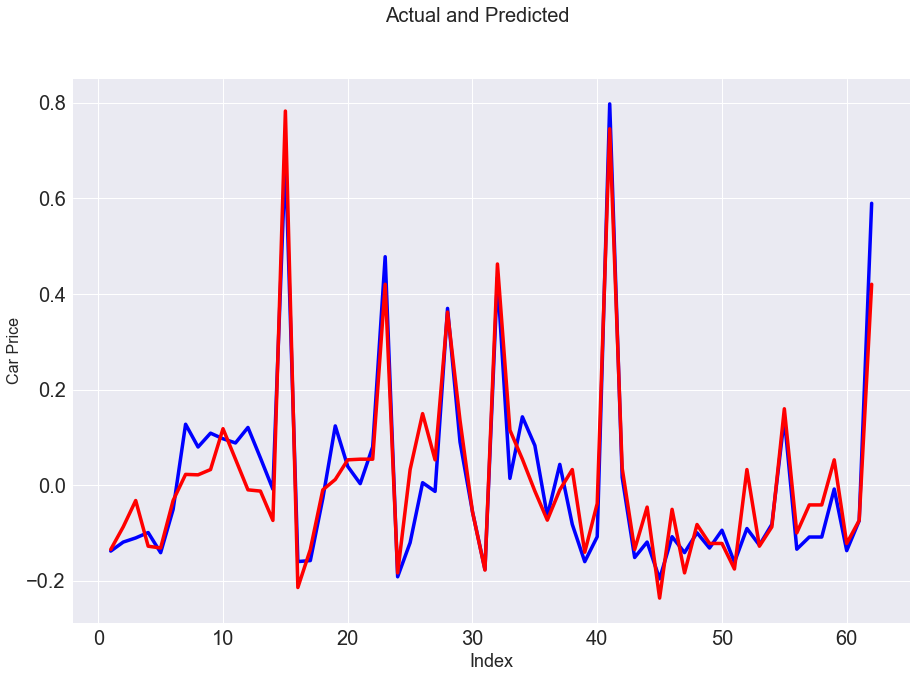

In [166]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(15,10))
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m9, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

Text(0,0.5,'y_pred')

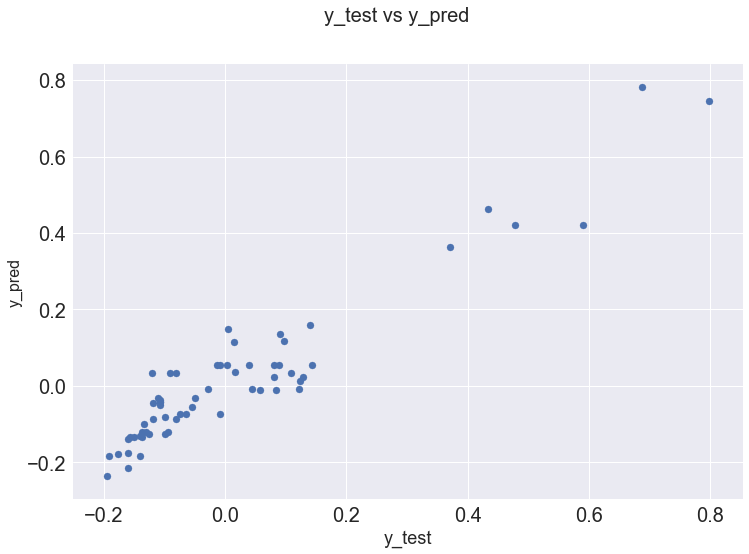

In [167]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred_m9)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

### Model Verification:
Lets scatter plot the error and see if the error is some random noise or white noise, or it has some pattern.

Text(0,0.5,'ytest-ypred')

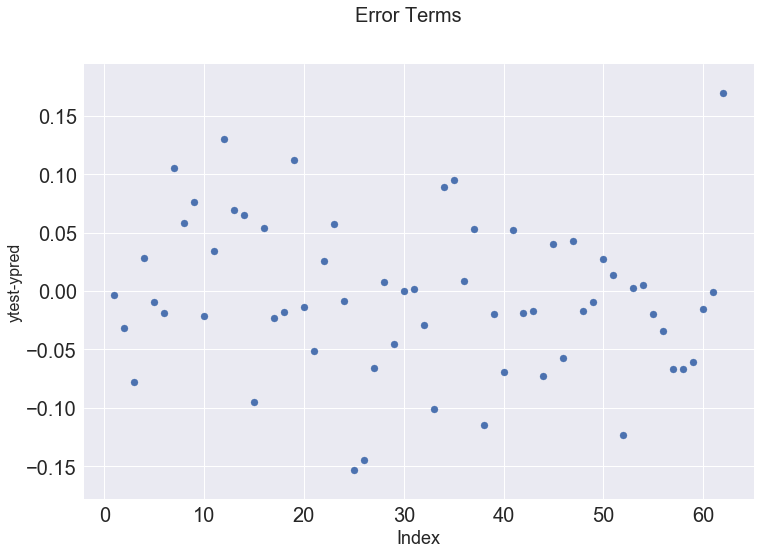

In [168]:
# Error terms
fig = plt.figure(figsize=(12,8))
c = [i for i in range(1,63,1)]
# plt.plot(c,y_test-y_pred_m9, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(c,y_test-y_pred_m9)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'Index')

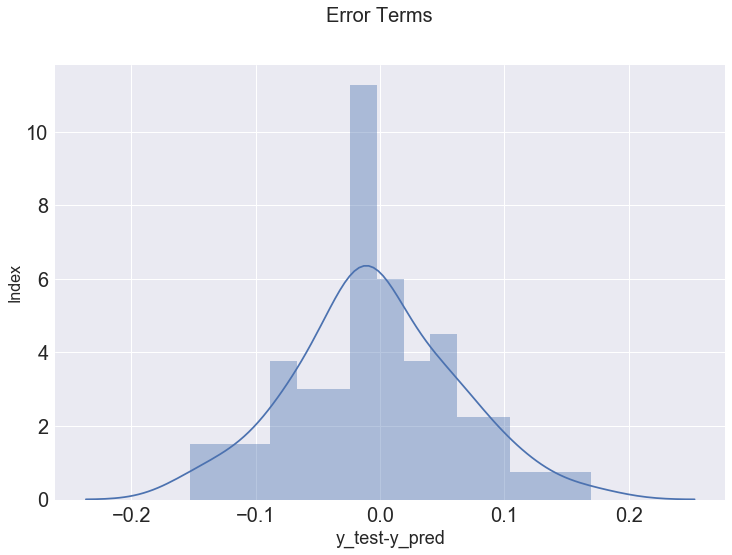

In [169]:
# Plotting the error terms to understand the distribution.
fig = plt.figure(figsize=(12,8))
sns.distplot((y_test-y_pred_m9),bins=15)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)             

<font color="Green"><b>Obervation:</b>As we can see in the above scatter plot the error is randomly distributed and it does not follow any pattern.  I think we are good to go with this model, which has both adjusted R square and R square close to 0.89</font>

In [170]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m9)))

RMSE : 0.06519190461262166


## Conclusion

<br>
<font color="Green">
1. The R square and Adjusted R square value in CarModelWithOutliers is almost same which is 89.8% and 89.2% respectively which indicates that none of the parameters in CarModelWithOutliers model are reduntant.
<br>
<br>

2. And also from Error Terms scatter plot we can see that the error (y_test-y-pred) is unequally distributed, and does not follow any pattern, as there is no curve, and shows no relation which indicates that it is just the white noise. 
<br>
<br>

3. The RSME value is 0.06519190461262164
<br>
<br>

4. As we can see that the model seems to be stable, The variables that can affect price are:<br>
 
        *enginesize	<br>*
        *carlength	<br>*
        *CarName_buick	<br>*
        *CarName_porsche	<br>*
        *CarName_bmw	<br>*
        *cylindernumber_two	<br>*
        *CarName_audi	<br>*
</font>

------------------------------------------------------